# Heart Disease Classification 
### Classification Part

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Loading Data

In [3]:
#Reading Data
Data=pd.read_csv('heart.csv')
df=Data.copy()
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Dataset Shape

In [4]:
df.shape

(303, 14)

#### Feature Types

In [5]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

#### Target Value Analysis

In [6]:
#Calculating No. target values
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

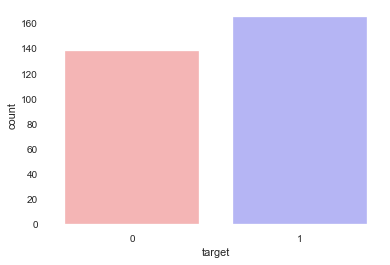

In [7]:
#Graphical representation of target values
sns.countplot(x='target',data=df,palette='bwr_r')
plt.show()

In [8]:
count_HaveDisease=len(df[df.target==1])
count_NoDisease=len(df[df.target==0])
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((count_HaveDisease / (len(df.target))*100)))
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((count_NoDisease / (len(df.target))*100)))

Percentage of Patients Have Heart Disease: 54.46%
Percentage of Patients Haven't Heart Disease: 45.54%


#### Group By Target Value of all Features

In [9]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


## Data Pre-Processing

**Checking Null Values**

In [10]:
#Checking if theres any missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### Handling Categorical Variables

In [11]:
#Since 'cp', 'thal', 'sex' and 'slope' are categorical variables we'll turn them into dummy variables.
df_cat = pd.get_dummies(df,columns = ['sex','cp','thal','slope'])
df=pd.DataFrame(df_cat, columns = df_cat.columns)
#Lets display the dataframe
df.head(2)

,age,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,145,233,1,0,150,0,2.3,0,1,...,0,0,1,0,1,0,0,1,0,0
1,37,130,250,0,1,187,0,3.5,0,1,...,0,1,0,0,0,1,0,1,0,0


#### Basic Descriptive Statistics

In [12]:
df.describe()

,age,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,0.729373,0.544554,...,0.165017,0.287129,0.075908,0.006601,0.059406,0.547855,0.386139,0.069307,0.462046,0.468647
std,9.082101,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,1.022606,0.498835,...,0.371809,0.453171,0.265288,0.081110,0.236774,0.498528,0.487668,0.254395,0.499382,0.499842
min,29.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,61.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,1.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,77.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,4.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Scaling Data using MinMax Scaler

In [13]:
#Scaling data
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
df_scaled = mms.fit_transform(df)
df = pd.DataFrame(df_scaled, columns = df.columns)
df.head()

,age,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,0.708333,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.166667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.250000,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.562500,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.583333,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


### Train/Test Split

In [14]:
#importing libraries
from sklearn.model_selection import train_test_split

In [15]:
#Creating Independent and Dependent Variables
X = df.drop(columns='target')
Y = df['target']

In [16]:
print('Original Data Set Size: ',df.shape)
print('Independent Variable X size: ',X.shape)
print('Target Variable Y size: ',Y.shape)

Original Data Set Size:  (303, 23)
Independent Variable X size:  (303, 22)
Target Variable Y size:  (303,)


In [17]:
#Splitting Data into training and testing
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.25,random_state=100)

### 1. K-Nearest Neighbors 

In [18]:
# Importing KNN Model
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [19]:
# Finding best fit value for k
error_rate = []
for i in range(1,20):   
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(xtrain,ytrain)
    i_pred = KNN.predict(xtest)
    error_rate.append(np.mean(i_pred != ytest))

Text(0, 0.5, 'Error Rate')

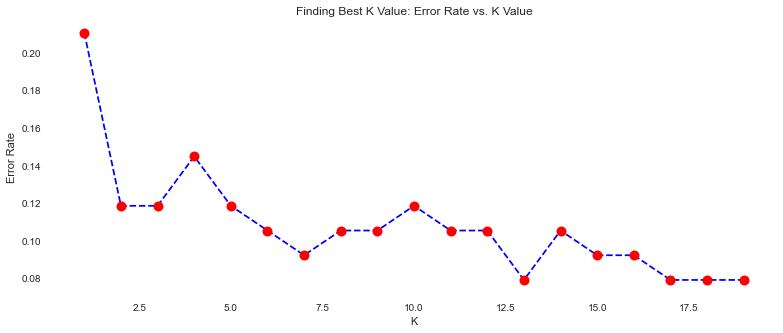

In [20]:
plt.figure(figsize=(13,5))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Finding Best K Value: Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

#### K = 17 is the best fit value we found

In [21]:
accuracies = {}
knn_ = KNeighborsClassifier(n_neighbors = 17)  # now putting k =17
knn_.fit(xtrain,ytrain)
k_pred= knn_.predict(xtest)
k_acc = accuracy_score(ytest,k_pred)

#### KNN Results: 

In [22]:
print("KNN after updating k value : {}%".format(k_acc))
accuracies['KNN'] = k_acc

KNN after updating k value : 0.9210526315789473%


### 2. Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
rfr = RandomForestClassifier(n_estimators = 20)
rfr.fit(xtrain,ytrain)
rfr_pred = rfr.predict(xtest)

#### Random Forest Results: 

In [25]:
rfr_acc = accuracy_score(ytest,rfr_pred)
accuracies['Random Forest'] = rfr_acc
print("Random Forest : {}%".format(rfr_acc))

Random Forest : 0.868421052631579%


### 3. Support Vector Machine (SVM)

In [26]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm.fit(xtrain,ytrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#### SVM Results: 

In [27]:
svm_pred = svm.predict(xtest)
svm_acc = accuracy_score(ytest,svm_pred)
accuracies['SVM'] = svm_acc
print("SVM : {}%".format(svm_acc))

SVM : 0.881578947368421%


### 4. Multinomial Naive Bayes

In [28]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

In [29]:
mnb.fit(xtrain,ytrain)
mnb_pred=mnb.predict(xtest)

#### Naive Bayes Results

In [30]:
mnb_acc= accuracy_score(ytest,mnb_pred)
accuracies['MNB']=mnb_acc
print("Multinomial Naive Bayes Accuracy: {}%".format(mnb_acc))

Multinomial Naive Bayes Accuracy: 0.9078947368421053%


### Q1.	Find Confusion Matrix, Accuracy, precision, Recall and F-measure for Classification of Each Algorithm

#### Plotting Accuracies of all Algorithms Applied

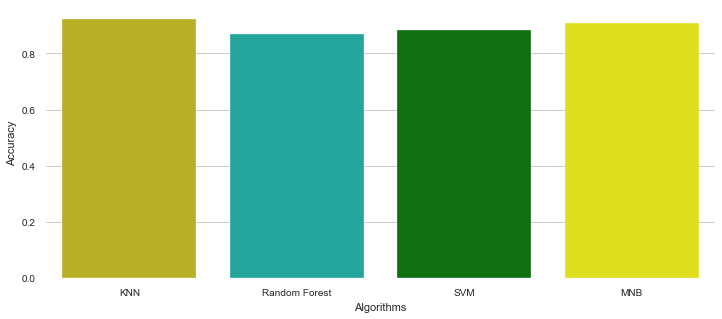

In [31]:
colors = ["#CFC60E","#0FBBAE","Green","Yellow"]
sns.set_style("whitegrid")
plt.figure(figsize=(12,5))
#plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.savefig("Comparion_all_algo.png")
plt.show()

#### Our models work fine but best of them are KNN and MNB with 92.10% and 90.70% of accuracy respectively. Let's look their confusion matrixes.

### Confusion Matrix

In [32]:
from sklearn.metrics import confusion_matrix,classification_report
cm_knn = confusion_matrix(ytest,k_pred)
cm_svm = confusion_matrix(ytest,svm_pred)
cm_mnb = confusion_matrix(ytest,mnb_pred)
cm_rf = confusion_matrix(ytest,rfr_pred)

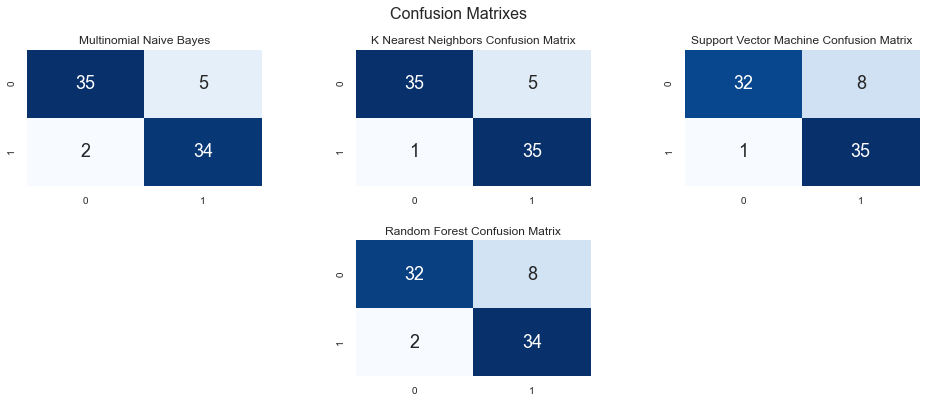

In [33]:
plt.figure(figsize=(16,6))

plt.suptitle("Confusion Matrixes",fontsize=16)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Multinomial Naive Bayes")
sns.heatmap(cm_mnb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 18})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 18})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 18})

plt.subplot(2,3,5)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 18})
plt.savefig("ConfusMatrix")
plt.show()

### Classificataion Report [ KNN ]

In [34]:
print(classification_report(ytest,k_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.88      0.92        40
         1.0       0.88      0.97      0.92        36

    accuracy                           0.92        76
   macro avg       0.92      0.92      0.92        76
weighted avg       0.93      0.92      0.92        76



### Classificataion Report [ SVM ]

In [35]:
print(classification_report(ytest,svm_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.80      0.88        40
         1.0       0.81      0.97      0.89        36

    accuracy                           0.88        76
   macro avg       0.89      0.89      0.88        76
weighted avg       0.90      0.88      0.88        76



### Classificataion Report [ Multi- Naive Bayes ]

In [36]:
print(classification_report(ytest,mnb_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.88      0.91        40
         1.0       0.87      0.94      0.91        36

    accuracy                           0.91        76
   macro avg       0.91      0.91      0.91        76
weighted avg       0.91      0.91      0.91        76



### Classificataion Report [ Random Forest ]

In [37]:
print(classification_report(ytest,rfr_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.80      0.86        40
         1.0       0.81      0.94      0.87        36

    accuracy                           0.87        76
   macro avg       0.88      0.87      0.87        76
weighted avg       0.88      0.87      0.87        76



### Q2.	Which algorithm perform best in what circumstances with given dataset on what conditions 

*K Nearest Neighbour is a simple algorithm that stores all the available cases and classifies the new data or case based on a similarity measure. It is mostly used to classifies a data point based on how its neighbours are classified. As our Dataset has low number of feautures so KNN performs better with a lower number of features than a large number of features.
When the number of features increases than it requires more data. Increase in dimension also leads to the problem of overfitting. Therefore After analyzing the classification report of each algorithm, I concluded that KNN is best fit for the above datset. Because it has high Accuracy, Precision, Recall and F-1 score among all the algorithms being used. Since I tuned parameters being used in KNN, therefore it gave best results.*